In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-car-insights/gcar_data.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/kaggle/input/german-car-insights/gcar_data.csv")
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6265,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,54886,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,76820,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,860,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


In [ ]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [ ]:
df = df.iloc[:,1:]
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


In [ ]:
df.groupby('brand')[['model']].nunique()

,model
brand,
alfa-romeo,22
aston-martin,12
audi,48
bentley,11
bmw,102
cadillac,13
chevrolet,21
chrysler,3
citroen,37


In [ ]:
df.groupby('transmission_type')['model'].nunique()

transmission_type
Automatic         498
Manual            397
Semi-automatic     66
Unknown           163
Name: model, dtype: int64

In [ ]:
df.isnull().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [ ]:
df = df[(df['transmission_type']!='Unknown')]
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


In [ ]:
df=df[(df['fuel_type']!='Other')]
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


In [ ]:
df.dropna()
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


In [ ]:
df.groupby('brand')['model'].count()

brand
alfa-romeo       1423
aston-martin      275
audi            21081
bentley           541
bmw             19696
cadillac          156
chevrolet         186
chrysler           29
citroen          4063
dacia            3360
daewoo             60
daihatsu          203
dodge             665
ferrari           574
fiat             5015
ford            18620
honda             776
hyundai          6944
infiniti          111
isuzu             206
jaguar           1395
jeep             1741
kia              5707
lada              190
lamborghini       357
lancia            104
land-rover       3053
maserati          697
mazda            2186
Name: model, dtype: int64

In [ ]:
df['year'].value_counts()[:30]

year
2019      12000
2018       9943
2023       8643
2017       7826
2022       7522
2020       7339
2016       6726
2021       5806
2015       5317
2014       4508
2013       3544
2012       3296
2011       3057
2009       2394
2010       2333
2008       1771
2007       1460
2006       1435
2005       1115
2004        922
2003        673
2002        461
2001        385
2000        295
1999        244
1998        167
1997        114
1996         42
1995         23
Petrol       19
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

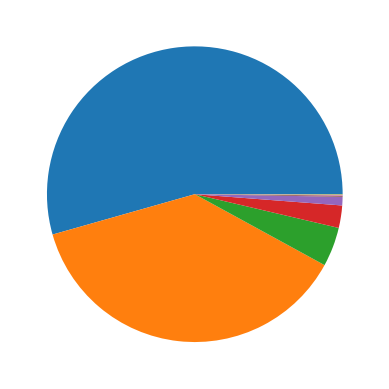

In [ ]:
x = df['fuel_type'].value_counts()[:9]
plt.pie(x)
plt.show()

<Axes: xlabel='brand', ylabel='count'>

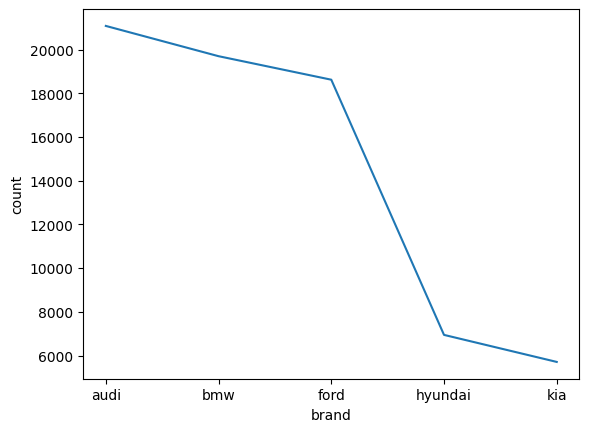

In [ ]:
sns.lineplot(data=df['brand'].value_counts().head())

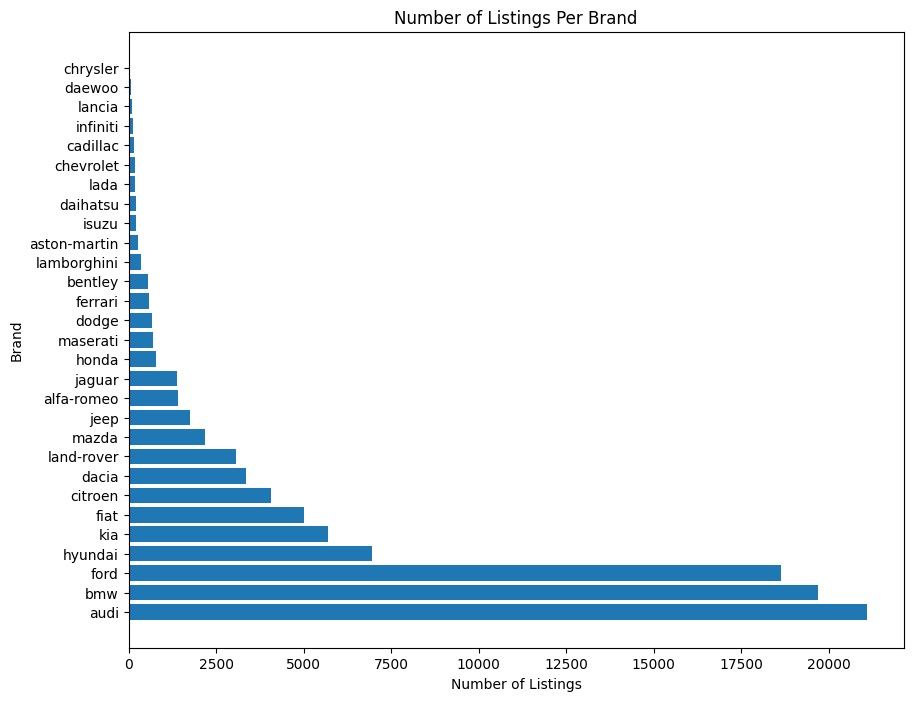

In [ ]:
plt.figure(figsize=(10, 8))

brand_counts = df['brand'].value_counts()

plot1 = plt.barh(brand_counts.index, brand_counts.values)

plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.title('Number of Listings Per Brand')
plt.show()